In [6]:
from skimage.feature import daisy
from skimage import data
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize
from skimage.exposure import histogram
%matplotlib inline

In [12]:
image1 = io.imread('../images/all/monet_136.jpg', flatten=True)
image2 = io.imread('../images/all/monet_198.jpg', flatten=True)
image3 = io.imread('../images/all/monet_200.jpg', flatten=True)
image4 = io.imread('../images/all/rembrandt_98.jpg', flatten=True)
image5 = io.imread('../images/all/rembrandt_102.jpg', flatten=True)
image6 = io.imread('../images/all/rembrandt_103.jpg', flatten=True)


In [13]:
print(histogram(image1, nbins=10)[0])

[   434   8292  25034  34977  19862  11647   9146 122843 846610 317955]


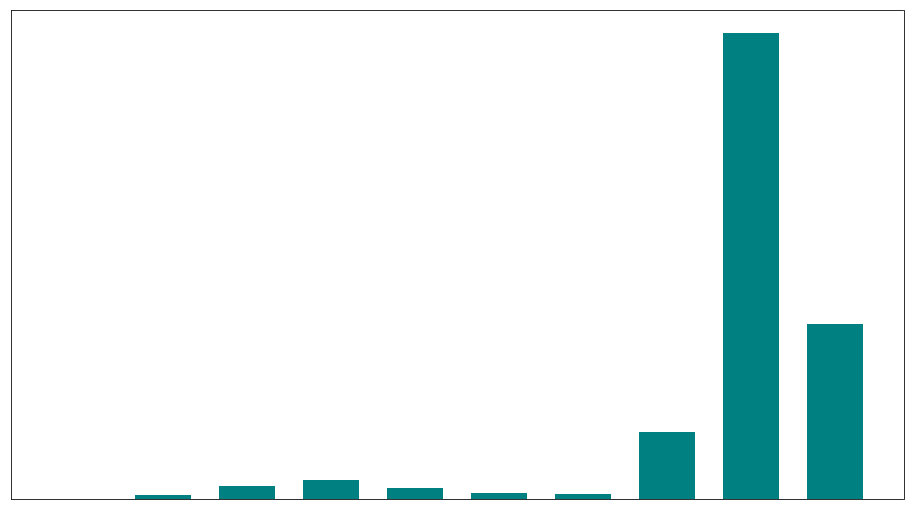

In [30]:
y = histogram(image1, nbins=10)[0]
N = len(y)
x = range(N)
width = 1/1.5
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(x, y, width, color="teal")
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.savefig('./monet_136_hist.png')
plt.show()

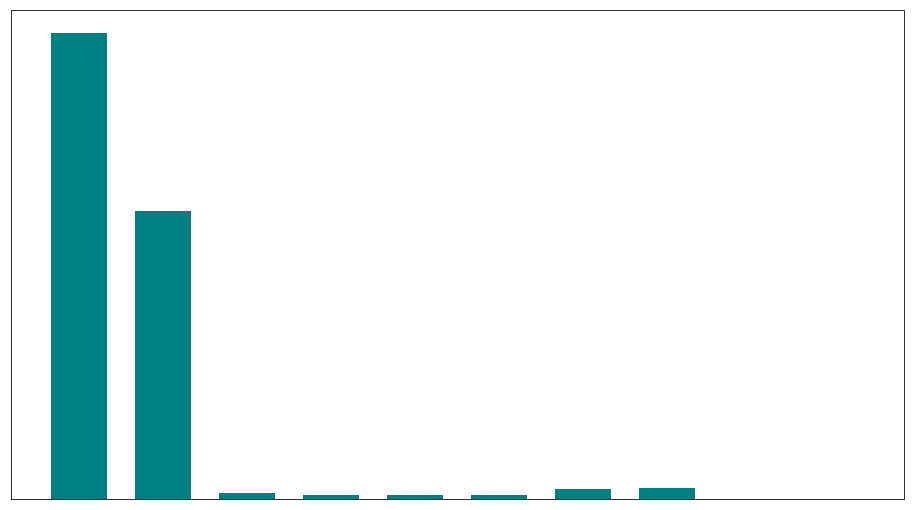

In [31]:
y = histogram(image4, nbins=10)[0]
N = len(y)
x = range(N)
width = 1/1.5
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(x, y, width, color="teal")
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.savefig('./rembrandt_98_hist.png')
plt.show()

In [5]:
descs, descs_img = daisy(image, step=180, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)
# descs, descs_img = daisy(image, visualize=True)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.axis('off')
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title('%i DAISY descriptors extracted:' % descs_num)
plt.show()




NameError: name 'image' is not defined

In [ ]:
import numpy as np

from sklearn.cluster import KMeans

images = io.imread_collection('../images/test_data/*.jpg')
print(len(images))

In [ ]:
X_flattened = []
for image in images: 
    painting_flattened = []
    for row in resize(image, (200, 200)):
        for pixel in row:
            for colour in pixel:
                painting_flattened.append(colour)
    X_flattened.append(painting_flattened)

In [ ]:
from skimage.color import rgb2gray

X = []
for image in images: 
    daisy_features = daisy(resize(rgb2gray(image), (200, 200)))
    features_flattened = []
    for x in daisy_features:
        for y in x:
            for z in y:
                features_flattened.append(z)
    X.append(features_flattened)

In [ ]:
X_grid_colour_means = []

for image in images: 
    GRID_WIDTH = 20
    resized_painting = resize(image, (200, 200))
    result = []
    for i in range(10):
        for j in range(10):
            grid = resized_painting[
                i*GRID_WIDTH:i*GRID_WIDTH+GRID_WIDTH,
                j*GRID_WIDTH:j*GRID_WIDTH+GRID_WIDTH,
                :
            ]
            result.append(grid[:, :, 0].mean())
            result.append(grid[:, :, 1].mean())
            result.append(grid[:, :, 2].mean())

            X_grid_colour_means.append(result)

In [ ]:
from skimage.feature import local_binary_pattern

X_texture = []

for image in images: 
    n_bins = 20
    lbp = local_binary_pattern(rgb2gray(image), 24, 3, 'uniform')
    X_texture.append(np.histogram(lbp, normed=True, bins=n_bins, range=(0, n_bins))[0])

In [ ]:
est = KMeans(n_clusters=10)
est.fit(X_grid_colour_means)
print(est.labels_)

In [ ]:
def show_matching_images(label_to_show): 
    images_to_show = []
    for i, label in enumerate(est.labels_): 
        if label == label_to_show: 
            images_to_show.append(images[i])
            
    f, axes = plt.subplots(nrows=4, ncols=len(images_to_show) // 4, figsize=(20, 20))

    for i, image in enumerate(images_to_show):
        axes.flat[i].imshow(image, cmap='gray')
        axes.flat[i].axis('off')

    plt.tight_layout()
    
show_matching_images(9)  

In [ ]:
f, axes = plt.subplots(nrows=20, ncols=len(images) // 20, figsize=(20, 80))

for i, image in enumerate(images):
    axes.flat[i].imshow(image, cmap='gray')
    axes.flat[i].axis('off')
    
plt.tight_layout()

In [ ]:
import glob
import os 
for i in range(0, 20): 
    for filename in glob.glob('../feature_extraction_sandbox/images/cluster_{}/*'.format(i)):
        os.remove(filename)

In [ ]:
for index, label in enumerate(est.labels_): 
    io.imsave('../feature_extraction_sandbox/images/cluster_{}/{}.jpg'.format(label, index), images[index])

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
print(X)

In [ ]:
rothko_81 = io.imread('../images/all/rothko_81.jpg')

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.axis('off')
ax.imshow(rothko_81)
plt.show()

In [ ]:
from skimage.exposure import histogram

grayscale_painting = rgb2gray(rothko_81)
print(histogram(grayscale_painting, nbins=10)[0])

In [ ]:
monet_156 = io.imread('../images/all/monet_156.jpg')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.axis('off')
ax.imshow(monet_156)
plt.show()
print(histogram(rgb2gray(monet_156), nbins=10)[0])

In [ ]:
monet_202 = io.imread('../images/all/monet_202.jpg')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.axis('off')
ax.imshow(monet_202)
plt.show()
print(histogram(rgb2gray(monet_202), nbins=10)[0])

In [ ]:
from skimage.feature import local_binary_pattern
lbp = local_binary_pattern(rgb2gray(monet_202), 24, 3, 'uniform')
n_bins = int(lbp.max() + 1)
print(np.histogram(lbp, normed=True, bins=n_bins, range=(0, n_bins))[0])

In [ ]:
lbp = local_binary_pattern(rgb2gray(rothko_81), 24, 3, 'uniform')
# n_bins = int(lbp.max() + 1)
n_bins = 20
print(np.histogram(lbp, normed=True, bins=n_bins, range=(0, n_bins))[0])

In [ ]:

# fig.set_size_inches(18.5, 10.5)
# ax.axis('off')
# ax.imshow(resize(monet_202, (200, 200)))
# plt.show()
print(monet_202.mean())
print(monet_202[:, :, 0].mean())
print(monet_202[:, :, 1].mean())
print(monet_202[:, :, 2].mean())
print(rothko_81.mean())
print(rothko_81[:, :, 0].mean())
print(rothko_81[:, :, 1].mean())
print(rothko_81[:, :, 2].mean())

GRID_WIDTH = 20
resized_monet = resize(rothko_81, (200, 200))
for i in range(10): 
    for j in range(10): 
        fig, ax = plt.subplots()
#         fig.set_size_inches(18.5, 10.5)
        ax.axis('off')
        ax.imshow(resized_monet[
            i*GRID_WIDTH:i*GRID_WIDTH+GRID_WIDTH, 
            j*GRID_WIDTH:j*GRID_WIDTH+GRID_WIDTH, 
            :
        ])
        plt.show()


In [ ]:
red_channel_copy = rothko_81.copy()
red_channel_copy[:,0,0] = 0
print(list(histogram(rgb2gray(red_channel_copy), nbins=10)[0]))

In [ ]:
result = []
red_channel_copy = rothko_81.copy()
red_channel_copy[:,0,0] = 0
result += list(histogram(rgb2gray(red_channel_copy), nbins=10)[0])
print(result)
green_channel_copy = rothko_81.copy()
green_channel_copy[0,:,0] = 0
result += list(histogram(rgb2gray(green_channel_copy), nbins=10)[0])
print(result)
blue_channel_copy = rothko_81.copy()
blue_channel_copy[0,0,:] = 0
result += list(histogram(rgb2gray(blue_channel_copy), nbins=10)[0])
print(result)

In [ ]:
result = []
red_channel_copy = monet_202.copy()
red_channel_copy[:,:,1:] = 0
print(list(histogram(rgb2gray(red_channel_copy), nbins=10)[0]))
green_channel_copy = monet_202.copy()
green_channel_copy[:,:,0::2] = 0
print(list(histogram(rgb2gray(green_channel_copy), nbins=10)[0]))
blue_channel_copy = monet_202.copy()
blue_channel_copy[:,:,:2] = 0
print(list(histogram(rgb2gray(blue_channel_copy), nbins=10)[0]))

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.axis('off')
ax.imshow(blue_channel_copy)
plt.show()

In [ ]:
from skimage import feature
print(feature.hog(grayscale_painting,
                                    orientations=3,
                                    pixels_per_cell=(8, 8),
                                    cells_per_block=(3, 3),
                                    block_norm='L2-Hys',
                                    transform_sqrt=False,
                                    feature_vector=True))

In [ ]:
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_


# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()